# Tests on petal occulters

In [2]:
from poly import *
from fresnel import *
import matplotlib.pyplot as plt
%matplotlib inline

### Create petal occulter structure, using SISTER profile NW2

In [5]:
p = petal_FT(
              n_border=100,
              profile_type="sister",
              profile_path="Matlab_files/NW2.mat",
              sinc_formula=True,
)

### Create diffraction structure, based on petal instance

In [7]:
diff = diffraction(p)

### Compute FT of occulter using polygonal approximation

In [8]:
diff.compute_polygonal_fmask()

nslices =  1426
Processing slice number 0 out of 1426
shape of wi is  (47061, 2)
3581383680
Processing slice number 1 out of 1426
shape of wi is  (47061, 2)
3581383680
Processing slice number 2 out of 1426
shape of wi is  (47061, 2)
3581383680
Processing slice number 3 out of 1426
shape of wi is  (47061, 2)
3581383680
Processing slice number 4 out of 1426
shape of wi is  (47061, 2)
3581383680
Processing slice number 5 out of 1426
shape of wi is  (47061, 2)
3581383680
Processing slice number 6 out of 1426
shape of wi is  (47061, 2)
3581383680
Processing slice number 7 out of 1426
shape of wi is  (47061, 2)
3581383680
Processing slice number 8 out of 1426
shape of wi is  (47061, 2)
3581383680
Processing slice number 9 out of 1426
shape of wi is  (47061, 2)
3581383680
Processing slice number 10 out of 1426
shape of wi is  (47061, 2)
3581383680
Processing slice number 11 out of 1426
shape of wi is  (47061, 2)
3581383680
Processing slice number 12 out of 1426
shape of wi is  (47061, 2)
3581

### Compute Fresnel filters for all wavelengths

In [9]:
#diff.compute_fresnel_filter(analytical=True)
diff.compute_fresnel_filter()

In [32]:
8192**2/(2.*diff.phase_filter.L)**2

793.1442209127403

1097.9567199515286


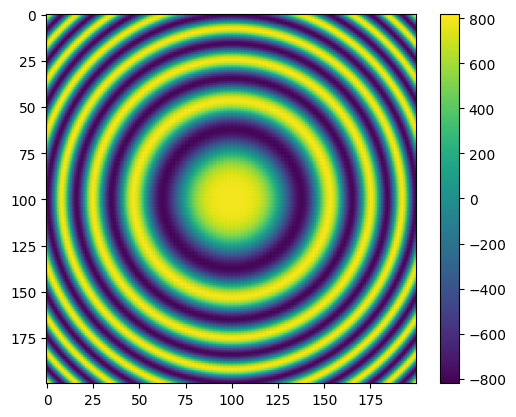

In [10]:
plt.imshow(diff.fresnel_filter[4096-100:4096+100,4096-100:4096+100,8].real)
print(np.abs(diff.fresnel_filter).max())
plt.colorbar()
plt.show()

In [12]:
diff.compute_diffraction_patterns()

Cuda is on !


In [15]:
diff.m

8192

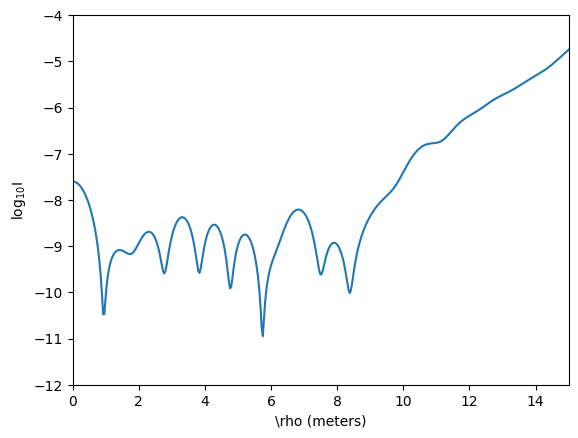

In [13]:
from matplotlib import pyplot as plt
arr = np.fft.fftshift(np.fft.fftfreq(diff.m, d=1.0 / (2.0 * diff.petal.L)))
plt.plot(arr, 2.0 * np.log10(np.abs(diff.diffracted[:, diff.m//2, 8])))
plt.ylabel(r'log$_{10}$I')
plt.xlabel(r'\rho (meters)')
plt.xlim(0,15)
plt.ylim(-12,-4)
plt.show()

In [28]:
from rdp import rdp
p = petal_FT(
              n_border=1000,
              profile_type="sister",
              profile_path="Matlab_files/NW2.mat",
              sinc_formula=True,
)
Gamma = rdp(p.Gamma,epsilon=2e-3)

In [26]:
Gamma.shape

(4273, 2)

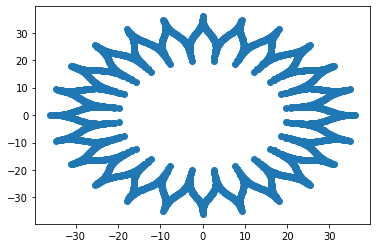

In [27]:
plt.scatter(Gamma[:,0],Gamma[:,1])
plt.show()

nslices =  1282
Processing slice number 0 out of 1282
shape of wi is  (52348, 2)
1074579456
Processing slice number 1 out of 1282
shape of wi is  (52348, 2)
1074579456
Processing slice number 2 out of 1282
shape of wi is  (52348, 2)
1074579456
Processing slice number 3 out of 1282
shape of wi is  (52348, 2)
1074579456
Processing slice number 4 out of 1282
shape of wi is  (52348, 2)
1074579456
Processing slice number 5 out of 1282
shape of wi is  (52348, 2)
1074579456
Processing slice number 6 out of 1282
shape of wi is  (52348, 2)
1074579456
Processing slice number 7 out of 1282
shape of wi is  (52348, 2)
1074579456
Processing slice number 8 out of 1282
shape of wi is  (52348, 2)
1074579456
Processing slice number 9 out of 1282
shape of wi is  (52348, 2)
1074579456
Processing slice number 10 out of 1282
shape of wi is  (52347, 2)
1074579456
Processing slice number 11 out of 1282
shape of wi is  (52347, 2)
1074579456
Processing slice number 12 out of 1282
shape of wi is  (52347, 2)
1074

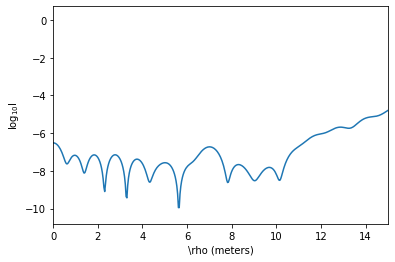

In [30]:
from rdp import rdp
p = petal_FT(
              n_border=1000,
              profile_type="sister",
              profile_path="Matlab_files/NW2.mat",
              sinc_formula=True,
              Gamma = Gamma
)
diffg = diffraction(p)
diffg.compute_polygonal_fmask()
diffg.compute_fresnel_filter()
#diffg.compute_diffraction_patterns()


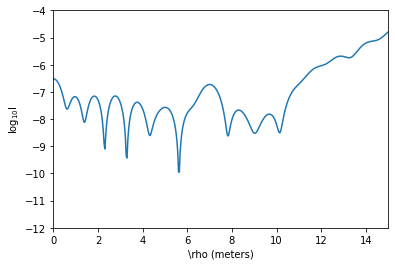

In [31]:
from matplotlib import pyplot as plt
arr = np.fft.fftshift(np.fft.fftfreq(diffg.m, d=1.0 / (2.0 * diffg.petal.L)))
plt.plot(arr, 2.0 * np.log10(np.abs(diffg.diffracted[:, diffg.m//2, 8])))
plt.ylabel(r'log$_{10}$I')
plt.xlabel(r'\rho (meters)')
plt.xlim(0,15)
plt.ylim(-12,-4)
plt.show()


### Compute area of polygones as a function of number of points

In [22]:
n_borders = [100,200,500,1000,2000,4000,8000,16000,32000,64000,128000]
areas = []
for nb in n_borders:
    p = petal_FT(
              n_border=nb,
              profile_type="sister",
              profile_path="Matlab_files/NW2.mat",
              sinc_formula=True,
    )
    area = p.area()
    print("number of points: %d"%p.npoints)
    areas.append(area)

nb_ref = 1000000
p_ref = petal_FT(
              n_border=nb_ref,
              profile_type="sister",
              profile_path="Matlab_files/NW2.mat",
              sinc_formula=True,
    )
area_ref = p_ref.area()
print ("Number of points in ref case: %d"%p_ref.npoints)

number of points: 4752
number of points: 9552
number of points: 23952
number of points: 47952
number of points: 95952
number of points: 191952
number of points: 383952
number of points: 767952
number of points: 1535952
number of points: 3071952
number of points: 6143952


In [23]:
areas

[2691.2245646470983,
 2691.231926591252,
 2691.2370373571757,
 2691.2379832754377,
 2691.238314045,
 2691.238455296043,
 2691.2385204561288,
 2691.2385518583033,
 2691.238567695138,
 2691.2385758284945,
 2691.2385799110925]

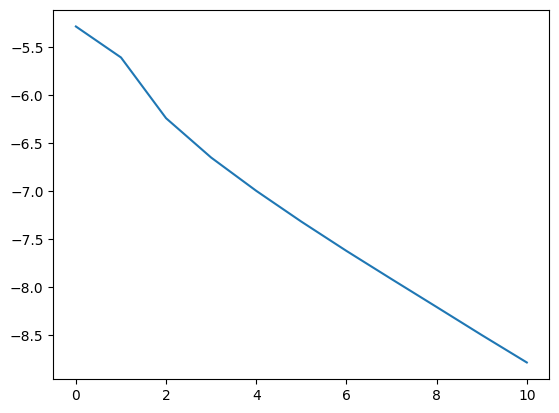

In [25]:
area_claude_petals = 2691.2384859890444
plt.plot(np.log10(np.abs(np.array(areas) - area_ref))-np.log10(area_ref))


In [3]:
nb_ref = 1000000
p_ref = petal_FT(
              n_border=nb_ref,
              profile_type="arch_cos",
              sinc_formula=True,
    )
area_ref = p_ref.area()

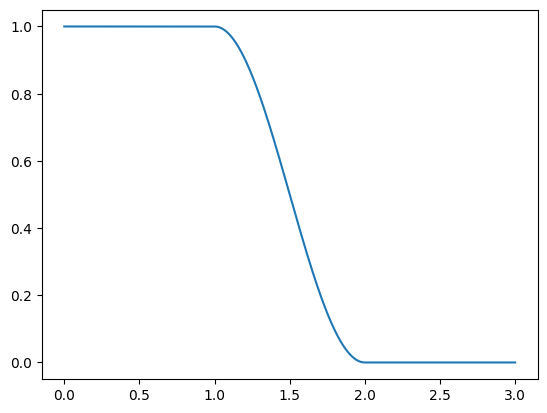

In [9]:
area_ref
p_ref.r_in, p_ref.r_out
r = np.linspace(0,3,1000)
plt.plot(r,p_ref.profile(r))
plt.show()

In [15]:
ri = p_ref.r_in; ro=p_ref.r_out
area = np.pi/2*(ro**2+ri**2) -2./np.pi*(ro-ri)**2
print((area - area_ref)/area)

6.229482095404413e-10
